# Introduction

In this notebook, you will learn how to:

1) Read the "GMT psvelomeca (old) format" Harvard Centroid Moment Tensor catalog using pandas

2) Plot a basemap

3) Plot focal mechanims on your basemap using a 'for' loop

# Import modules

The first step is to import modules we will need.

In [3]:
% matplotlib inline                  

import pandas as pd                  
import numpy as np                   

import cartopy                       
import cartopy.crs as ccrs           
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# Read CMT moment tensor catalog

We will read a catalog downloaded from the Harvard Centroid Moment Tensor (CMT) database using the pandas module.

See http://www.globalcmt.org/CMTsearch.html for more details.

In [4]:
df = pd.read_csv('data/global_CMT_1976_2017.csv',delim_whitespace=True)

In [5]:
df.describe()

,lon,lat,str1,dip1,rake1,str2,dip2,rake2,sc,iexp
count,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000
mean,123.353788,-2.002424,194.325758,40.606061,52.424242,189.204545,69.371212,53.030303,3.001470,25.166667
std,9.736853,5.571876,113.489650,16.520520,93.952410,105.669060,12.357527,81.109759,1.749548,0.430988
min,94.650000,-9.690000,1.000000,2.000000,-178.000000,4.000000,46.000000,-157.000000,0.903000,25.000000
25%,123.552500,-7.225000,80.500000,29.000000,10.500000,92.500000,59.750000,34.000000,1.608250,25.000000
50%,127.185000,-3.710000,196.500000,40.500000,67.500000,198.000000,68.000000,71.500000,2.440500,25.000000
75%,128.655000,3.370000,311.250000,50.250000,129.250000,290.250000,81.000000,108.250000,4.119750,25.000000
max,132.420000,6.630000,358.000000,80.000000,176.000000,358.000000,89.000000,166.000000,8.490000,27.000000


# Plot the basemap

Let's look at some earthquakes in the Sumatra region.

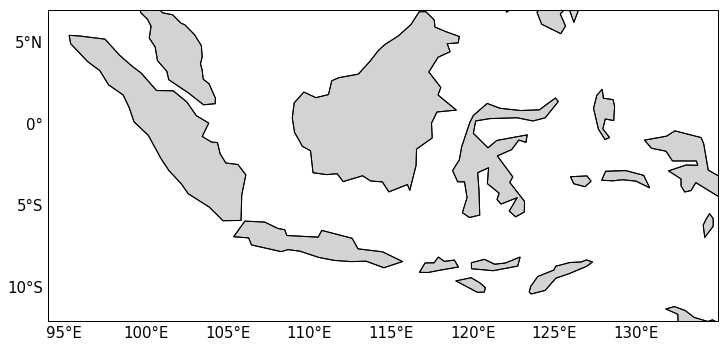

In [6]:
fig, ax = plt.subplots(1,figsize=(12,12))

proj = ccrs.PlateCarree()                       # the projection you want to use, many are supported, 
                                                # this one is the standard for geographic coordinates
    
ax = plt.axes(projection=proj)                  # sets the projection

ax.set_xlim(94,135)                             # set region for Banda Arc
ax.set_ylim(-12,7)

ax.add_feature(cartopy.feature.OCEAN            # add ocean feature
               , zorder=0                       # layer where ocean should plot; 0 is base   
               , facecolor='w'                  # color of the ocean
              )           

ax.add_feature(cartopy.feature.LAND             # add continent feature
               , zorder=0                       # layer where continent should plot; 0 is base
               , edgecolor='black'              # coastline color
               , facecolor='lightgray'          # continent color
              )               

ax.coastlines(resolution='110m')                # the level of resolution to render the drawings, 
                                                # see documentation for more details

gl = ax.gridlines(crs=ccrs.PlateCarree()        
                , draw_labels=True              # label coordinates
                , linewidth=0                   # line properties can be changed similar to matplotlib
                , color='gray'
                , alpha=0.5
                , linestyle='--')

gl.xlabels_top = gl.ylabels_right = False                        # where labels shouldn't be
gl.xlocator = mticker.FixedLocator(np.arange(95,140,5))          # sets longitude tick marks
gl.ylocator = mticker.FixedLocator(np.arange(-15,10,5))          # sets latitude tick marks using numpy module
gl.xformatter = LONGITUDE_FORMATTER                              # set cartopy formatting
gl.yformatter = LATITUDE_FORMATTER

gl.xlabel_style = {'size': 15}                                   # change label font sizes
gl.ylabel_style = {'size': 15}

That's a lot of code, and we'll be using it over and over again. So to keep things neat, let's make our Sumatra map reproduceable using a function.

In [7]:
def Sumatra_map():
    
    fig, ax = plt.subplots(1,figsize=(12,12))

    proj = ccrs.PlateCarree()                       # the projection you want to use, many are supported, 
                                                    # this one is the standard for geographic coordinates

    ax = plt.axes(projection=proj)                  # sets the projection

    ax.set_xlim(94,135)                             # set region for Banda Arc
    ax.set_ylim(-12,7)

    ax.add_feature(cartopy.feature.OCEAN            # add ocean feature
                   , zorder=0                       # layer where ocean should plot; 0 is base   
                   , facecolor='w'                  # color of the ocean
                  )           

    ax.add_feature(cartopy.feature.LAND             # add continent feature
                   , zorder=0                       # layer where continent should plot; 0 is base
                   , edgecolor='black'              # coastline color
                   , facecolor='lightgray'          # continent color
                  )               

    ax.coastlines(resolution='110m')                # the level of resolution to render the drawings, 
                                                    # see documentation for more details

    gl = ax.gridlines(crs=ccrs.PlateCarree()        
                    , draw_labels=True              # label coordinates
                    , linewidth=0                   # line properties can be changed similar to matplotlib
                    , color='gray'
                    , alpha=0.5
                    , linestyle='--')

    gl.xlabels_top = gl.ylabels_right = False                        # where labels shouldn't be
    gl.xlocator = mticker.FixedLocator(np.arange(95,140,5))          # sets longitude tick marks
    gl.ylocator = mticker.FixedLocator(np.arange(-15,10,5))          # sets latitude tick marks using numpy module
    gl.xformatter = LONGITUDE_FORMATTER                              # set cartopy formatting
    gl.yformatter = LATITUDE_FORMATTER

    gl.xlabel_style = {'size': 15}                                   # change label font sizes
    gl.ylabel_style = {'size': 15}
    
    return fig, ax, proj

To plot focal mechanisms on our map, we will use the Obspy beach module. So let's import that.

In [8]:
from obspy.imaging.beachball import beach

Here, we add a single focal mechanism from the CMT catalog using one of its nodal planes strike, dip, and rake. We gather this information from our Pandas dataframe using a select index. 

Here we use strike, dip, and rake, but as another option, you can use the moment tensor itself. For information on that, please see [this documentation](https://docs.obspy.org/packages/autogen/obspy.imaging.beachball.beach.html?highlight=beach#obspy.imaging.beachball.beach).


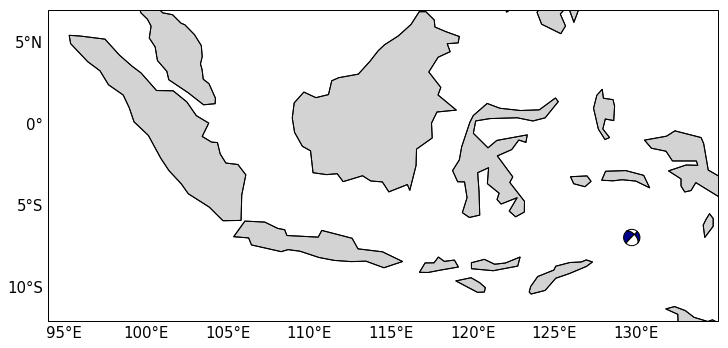

In [9]:
fig, ax, proj = Sumatra_map()           # make the basemap

idx = 0                                 # event at index 0
lon = df.lon[idx]                       # longitude of event at index 0
lat = df.lat[idx]                       # latitude of event at index 0
strike = df.str1[idx]                   # strike of nodal plane 1 of event at index 0
dip = df.dip1[idx]                      # dip of nodal plane 1 of event at index 0
rake = df.rake1[idx]                    # rake of nodal plane 1 of event at index 0

bball = beach([strike, dip, rake]       # build beachball as a collection
              , xy=(lon,lat)            # where to plot beachball on the map
              , width=(1,1)             # scale of the beachball in the (x,y) plane
              , linewidth=1             # thickness of nodal planes and beachball edge lines
              , facecolor='darkblue'    # color of one of the axes
              , zorder=1)               # make sure beachball plots on top

ax.add_collection(bball)                # add the beachball the plot

Now, let's add focal mechanisms for all of our events in the CMT catalog. To do that, let's run it in a 'for' loop.

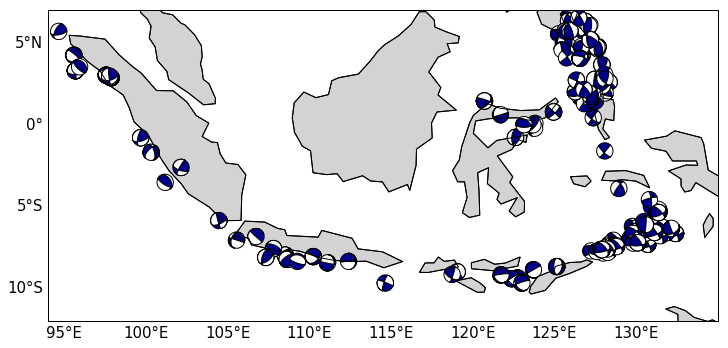

In [10]:
fig, ax, proj = Sumatra_map()           # make the basemap       

for strike,dip,rake,lon,lat in zip(df.str1,df.dip1,df.rake1,df.lon,df.lat):

    bball = beach([strike, dip, rake]   # build beachball as a collection
              , xy=(lon,lat)            # where to plot beachball in the map
              , width=(1,1)             # scale of the beachball in the (x,y) plane
              , linewidth=1             # thickness of nodal planes and beachball edge lines
              , facecolor='darkblue'    # color of one of the axes
              , zorder=1)               # make sure beachball plots on top

    ax.add_collection(bball)            # add the beachball the plot
    